<a href="https://colab.research.google.com/github/Divi-R0706/credit-card-fraud-detection/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("/content/fraudTrain.csv")
df_test = pd.read_csv("/content/fraudTest.csv")

In [3]:
print(df_train.shape[1])
print(df_test.shape[1])

23
23


In [4]:
df = pd.concat([df_train, df_test])
df.shape[1]

23

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


<Axes: xlabel='is_fraud'>

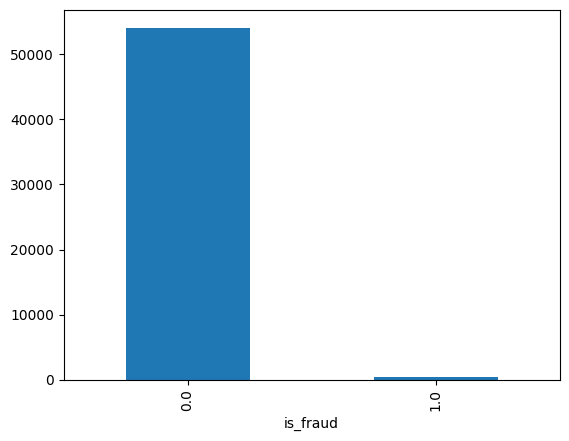

In [6]:
df.groupby("is_fraud").count()["cc_num"].plot(kind = "bar")

In [7]:
fraud = df[df["is_fraud"] == 2]
not_fraud =  df[df["is_fraud"] == 1]
print(fraud.shape[1])
print(not_fraud.shape[1])

23
23


In [8]:
not_fraud = not_fraud.sample(fraud.shape[0], random_state = 42)
df_new = pd.concat([fraud, not_fraud])

(23, 23)


<Axes: xlabel='is_fraud'>

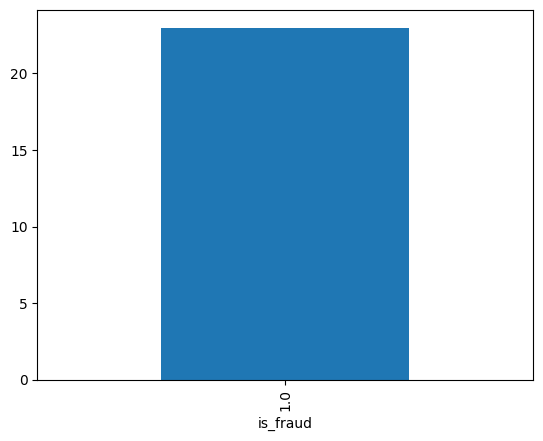

In [9]:
fraud = df[df["is_fraud"] == 2]
not_fraud =  df[df["is_fraud"] == 1]
# Use shape[0] to get the number of rows
not_fraud = not_fraud.sample(fraud.shape[1], random_state = 32)
df_new = pd.concat([fraud, not_fraud])

# Verify that df_new is not empty
print(df_new.shape)

df_new.groupby("is_fraud").count()['cc_num'].plot(kind = "bar")

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 2650 to 4654
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             23 non-null     int64  
 1   trans_date_trans_time  23 non-null     object 
 2   cc_num                 23 non-null     int64  
 3   merchant               23 non-null     object 
 4   category               23 non-null     object 
 5   amt                    23 non-null     float64
 6   first                  23 non-null     object 
 7   last                   23 non-null     object 
 8   gender                 23 non-null     object 
 9   street                 23 non-null     object 
 10  city                   23 non-null     object 
 11  state                  23 non-null     object 
 12  zip                    23 non-null     float64
 13  lat                    23 non-null     float64
 14  long                   23 non-null     float64
 15  city_pop

In [11]:
useless_cols = [
    'Unnamed: 0',
    'merchant',
    'cc_num',
    'first',
    'zip',
    'last',
    'trans_num',
    'unix_time',
    'street',
    'merch_lat',
    'gender',
    'merch_long',
    'job',
    'trans_date_trans_time'
]

# Dropping the columns
df_new.drop(columns=useless_cols, inplace=True)

In [12]:
df_new.isna().sum().sum()

0

In [13]:
df_new.duplicated().sum()

0

In [14]:
df_new.drop_duplicates()

,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2650,shopping_net,967.86,Vero Beach,FL,27.6330,-80.4031,105638.0,1986-05-07,1.0
19822,shopping_net,1060.34,Mobile,AL,30.7145,-88.0918,270712.0,1972-01-05,1.0
14241,shopping_net,1131.66,Ironton,OH,38.5294,-82.6654,21635.0,2001-07-10,1.0
15508,travel,9.91,Ironton,OH,38.5294,-82.6654,21635.0,2001-07-10,1.0
12329,shopping_net,1127.56,Downsville,NY,42.0716,-75.0152,1228.0,1990-02-25,1.0
26163,shopping_pos,1013.85,Akron,OH,41.0695,-81.5488,272134.0,1964-03-15,1.0
24216,grocery_net,15.05,Westerville,NE,41.4193,-99.3844,73.0,1935-02-10,1.0
18537,shopping_net,895.25,Gadsden,AL,34.0480,-85.9246,67082.0,1963-02-09,1.0
24070,food_dining,121.62,Westerville,NE,41.4193,-99.3844,73.0,1935-02-10,1.0
23922,health_fitness,21.47,Moriches,NY,40.8095,-72.8229,3285.0,1988-04-27,1.0


In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 2650 to 4654
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  23 non-null     object 
 1   amt       23 non-null     float64
 2   city      23 non-null     object 
 3   state     23 non-null     object 
 4   lat       23 non-null     float64
 5   long      23 non-null     float64
 6   city_pop  23 non-null     float64
 7   dob       23 non-null     object 
 8   is_fraud  23 non-null     float64
dtypes: float64(5), object(4)
memory usage: 2.3+ KB


In [16]:
df_new["dob"] = pd.to_datetime(df_new["dob"])

In [17]:
from datetime import datetime
df_new["dob"] = df_new["dob"].dt.year
df_new['dob'] = datetime.now().year - df_new['dob']
df_new = df_new.rename(columns = {"dob" : "age"})
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2650,shopping_net,967.86,Vero Beach,FL,27.6330,-80.4031,105638.0,38,1.0
19822,shopping_net,1060.34,Mobile,AL,30.7145,-88.0918,270712.0,52,1.0
14241,shopping_net,1131.66,Ironton,OH,38.5294,-82.6654,21635.0,23,1.0
15508,travel,9.91,Ironton,OH,38.5294,-82.6654,21635.0,23,1.0
12329,shopping_net,1127.56,Downsville,NY,42.0716,-75.0152,1228.0,34,1.0
26163,shopping_pos,1013.85,Akron,OH,41.0695,-81.5488,272134.0,60,1.0
24216,grocery_net,15.05,Westerville,NE,41.4193,-99.3844,73.0,89,1.0
18537,shopping_net,895.25,Gadsden,AL,34.0480,-85.9246,67082.0,61,1.0
24070,food_dining,121.62,Westerville,NE,41.4193,-99.3844,73.0,89,1.0
23922,health_fitness,21.47,Moriches,NY,40.8095,-72.8229,3285.0,36,1.0


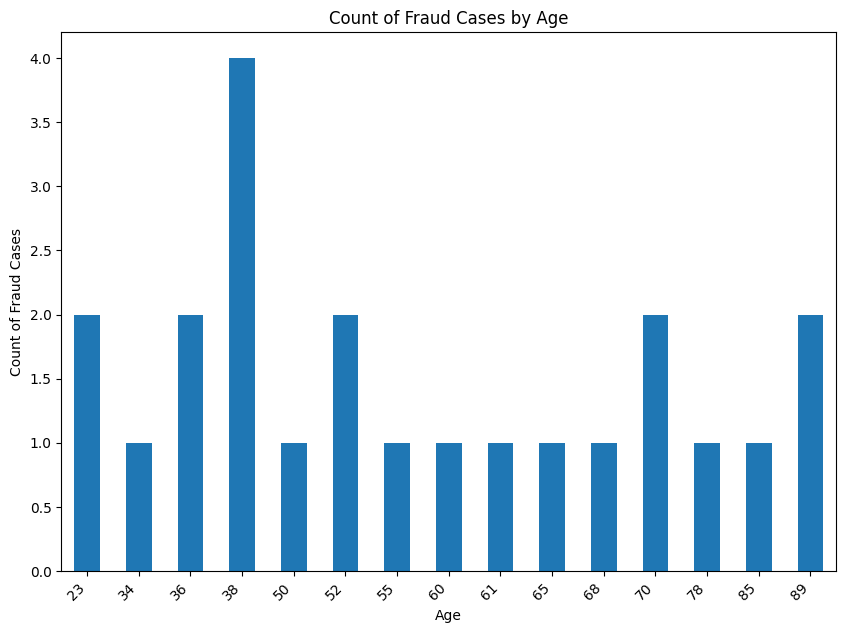

In [18]:
plt.figure(figsize=(10, 7))
ax = df_new[df_new['is_fraud'] == 1].groupby('age').count()['is_fraud'].plot(kind='bar')
ax.set_xlabel('Age')
ax.set_ylabel('Count of Fraud Cases')
ax.set_title('Count of Fraud Cases by Age')
plt.xticks(rotation=45, ha='right')
plt.show()


In [19]:
numeric_columns = [i for i in df_new.columns if df_new[i].dtype == 'int64' or df_new[i].dtype =='int32' or df_new[i].dtype =='float64']
categorical_columns = [i for i in df_new.columns if df_new[i].dtype == 'object']

In [20]:
print(numeric_columns)
print(categorical_columns)

['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']
['category', 'city', 'state']


In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
for col in categorical_columns:
    df_new[col] = encoder.fit_transform(df_new[col])
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2650,7,967.86,13,3,27.6330,-80.4031,105638.0,38,1.0
19822,7,1060.34,8,1,30.7145,-88.0918,270712.0,52,1.0
14241,7,1131.66,7,9,38.5294,-82.6654,21635.0,23,1.0
15508,9,9.91,7,9,38.5294,-82.6654,21635.0,23,1.0
12329,7,1127.56,4,8,42.0716,-75.0152,1228.0,34,1.0
26163,8,1013.85,0,9,41.0695,-81.5488,272134.0,60,1.0
24216,2,15.05,16,7,41.4193,-99.3844,73.0,89,1.0
18537,7,895.25,5,1,34.0480,-85.9246,67082.0,61,1.0
24070,1,121.62,16,7,41.4193,-99.3844,73.0,89,1.0
23922,4,21.47,9,8,40.8095,-72.8229,3285.0,36,1.0


In [22]:
columns = df_new.columns.tolist()
columns.remove('is_fraud')
X = df_new.drop(['is_fraud'], axis=1)
y = df_new['is_fraud']

scaler = StandardScaler()

X[columns] = scaler.fit_transform(X[columns])
df_new[X.columns] = X
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2650,0.527046,0.786796,0.921546,-0.737309,-1.469441,0.440260,0.559613,-0.825778,1.0
19822,0.527046,1.002804,-0.097471,-1.365387,-1.070457,0.029423,2.371754,-0.114814,1.0
14241,0.527046,1.169387,-0.301275,1.146925,-0.058608,0.319377,-0.362551,-1.587525,1.0
15508,1.335184,-1.450711,-0.301275,1.146925,-0.058608,0.319377,-0.362551,-1.587525,1.0
12329,0.527046,1.159811,-0.912685,0.832886,0.400025,0.728157,-0.586574,-1.028911,1.0
26163,0.931115,0.894216,-1.727898,1.146925,0.270276,0.379041,2.387364,0.291451,1.0
24216,-1.493298,-1.438706,1.532956,0.518847,0.315567,-0.573985,-0.599253,1.764162,1.0
18537,0.527046,0.617199,-0.708881,-1.365387,-0.638846,0.145225,0.136355,0.342234,1.0
24070,-1.897367,-1.189787,1.532956,0.518847,0.315567,-0.573985,-0.599253,1.764162,1.0
23922,-0.685160,-1.423710,0.106332,0.832886,0.236612,0.845301,-0.563992,-0.927344,1.0


In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)


In [25]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier()
}

In [26]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [27]:
# Add this code before the model evaluation loop
print(y_train.unique())  # Check unique values in y_train
print(y_test.unique())   # Check unique values in y_test

[1.]
[1.]


In [28]:
# Add this code before the model evaluation loop
print("Unique values in y_train:", y_train.unique())  # Check unique values in y_train
print("Unique values in y_test:", y_test.unique())    # Check unique values in y_test

# Evaluate each model
results = {}
for name, model in models.items():
    # Handle the case where y_train has only one class
    if len(y_train.unique()) < 2:
        print(f"Warning: {name} skipped due to only one class in training data.") # Print warning for any model
        results[name] = {'Accuracy': 'N/A', 'Precision': 'N/A', 'Recall': 'N/A', 'F1 Score': 'N/A'}
        continue  # Skip to the next model

    # Evaluate the model
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Create a DataFrame to display the results
results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)

Unique values in y_train: [1.]
Unique values in y_test: [1.]
                    Accuracy Precision Recall F1 Score
Logistic Regression      N/A       N/A    N/A      N/A
Decision Tree            N/A       N/A    N/A      N/A
Random Forest            N/A       N/A    N/A      N/A
Gradient Boosting        N/A       N/A    N/A      N/A
XGBoost                  N/A       N/A    N/A      N/A
SVC                      N/A       N/A    N/A      N/A
KNN                      N/A       N/A    N/A      N/A
Naive Bayes              N/A       N/A    N/A      N/A
AdaBoost                 N/A       N/A    N/A      N/A


In [29]:
# Import necessary library for label encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Fit and transform the training labels
y_train_encoded = le.fit_transform(y_train)

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model on the training data with encoded labels
xgb_model.fit(X_train, y_train_encoded)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:58:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
# Print confusion matrix and classification report
y_pred = xgb_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[0 0]
 [5 0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00       5.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

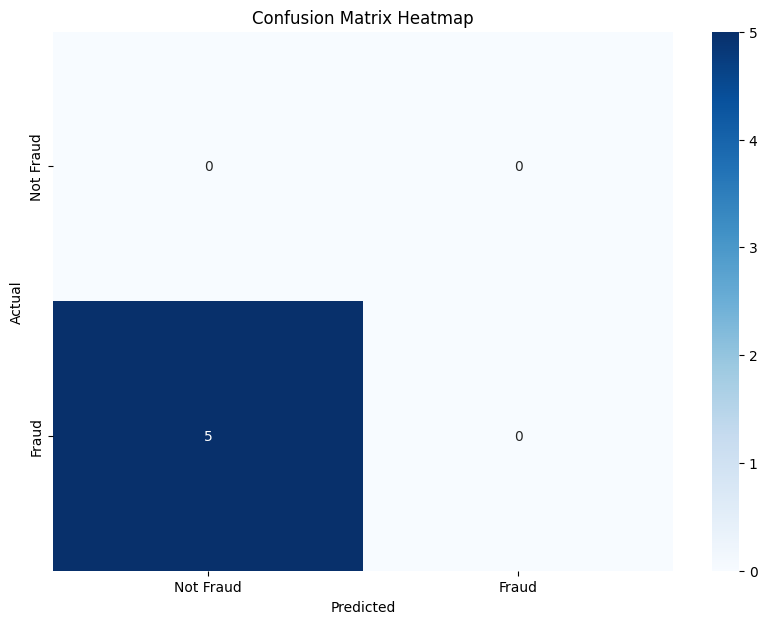

In [31]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [32]:
# Save the model to a file
import joblib
joblib.dump(xgb_model, 'xgboost_model.pkl')

['xgboost_model.pkl']